In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-intern-dataset-imagoai/TASK-ML-INTERN.csv


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
!pip install optuna
import optuna
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("/kaggle/input/ml-intern-dataset-imagoai/TASK-ML-INTERN.csv")
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


# data Information


In [4]:
df.shape

(500, 450)

Here in the dataset there is 448 features (spectral bands) and Target is vomitoxin_ppb

In [5]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


# Basic Preprocessing of Data 

In [8]:
print(df.isnull().sum())

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


No Missing Values 

In [9]:
df.duplicated().sum()

0

No duplicates 

## Removing Outliers 

In [10]:
df['vomitoxin_ppb'].describe()

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64

<Axes: xlabel='vomitoxin_ppb', ylabel='Density'>

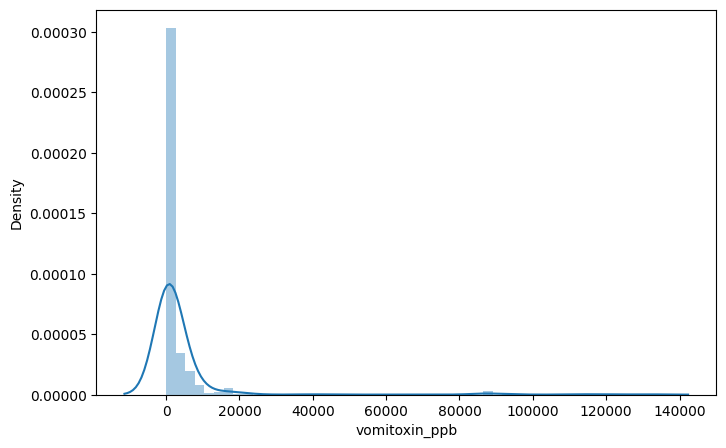

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(df['vomitoxin_ppb'])

From the above curve it looks more like a normal distribution and upto 20000 concentration of vomitoxin_ppb 98% data is covered

In [12]:
print(df[df['vomitoxin_ppb'] <= 20000].shape)

(490, 450)


So will treat above 20000 vomitoxin_ppb  as outlier 

In [13]:
df = df[df['vomitoxin_ppb'] <= 20000]

# EDA And Visualization

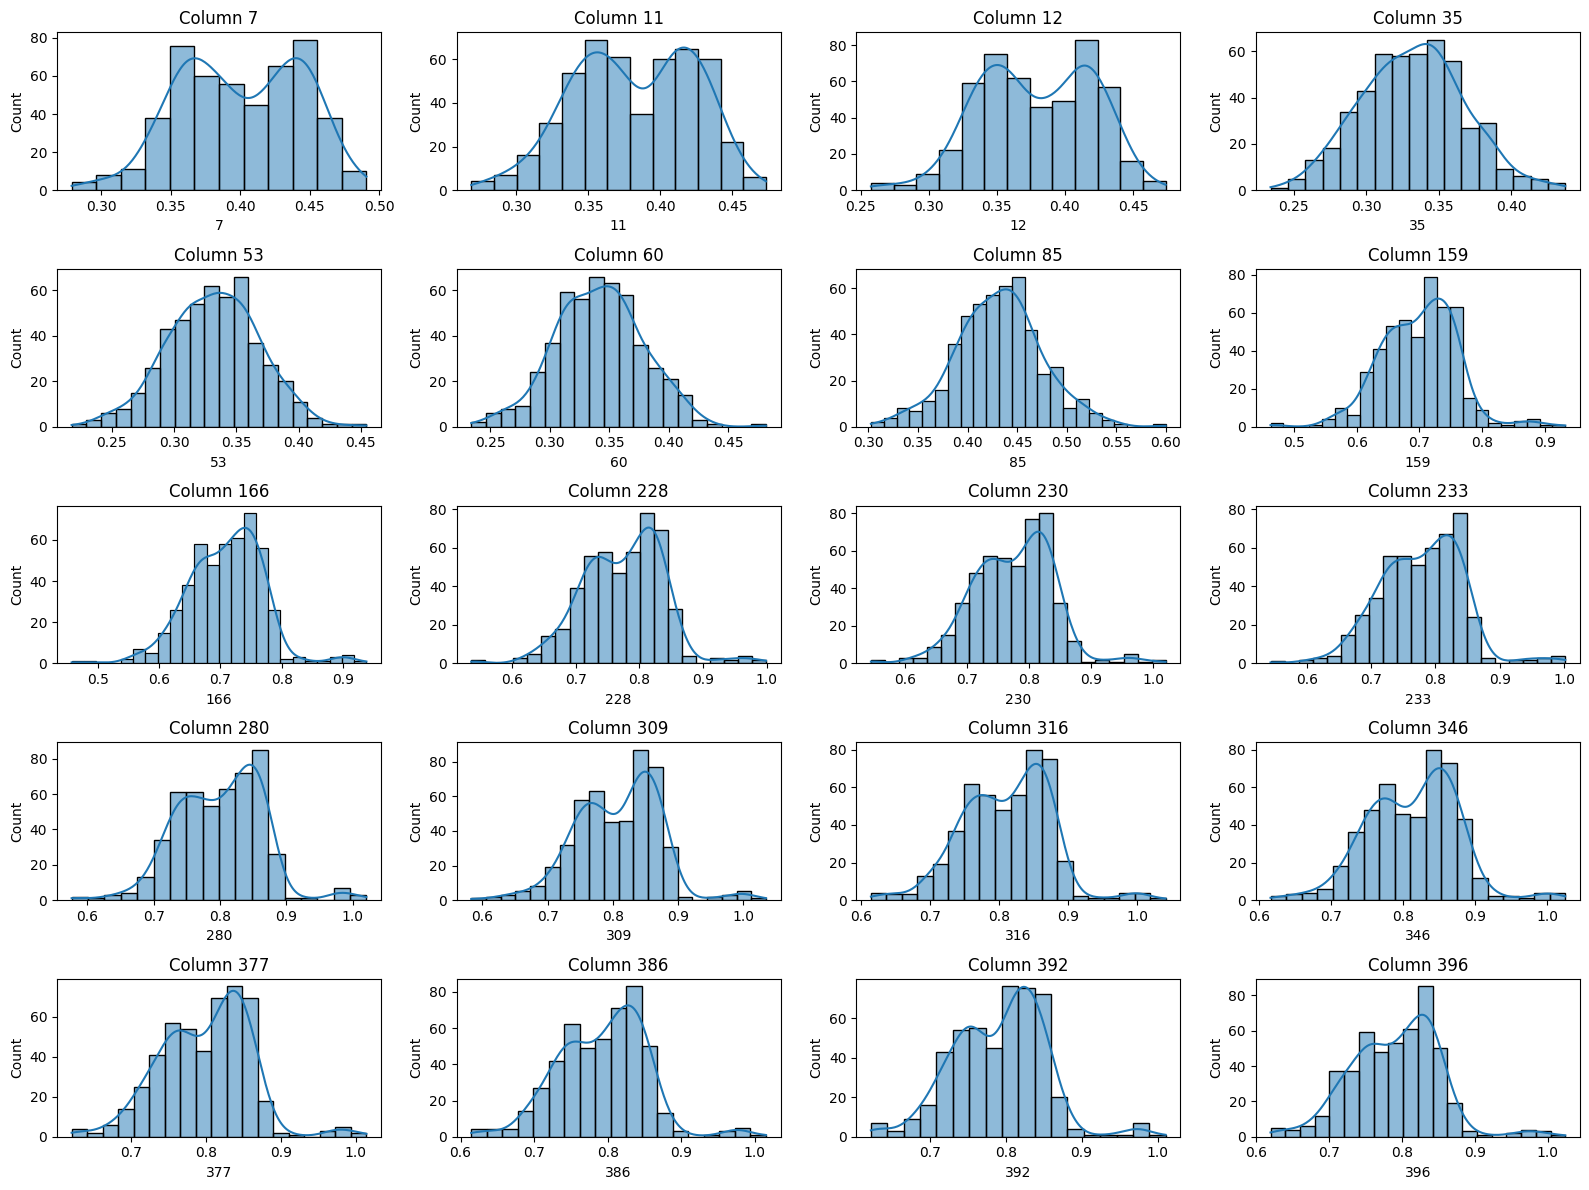

In [14]:
plt.figure(figsize=(16, 12))

for i, col_num in enumerate(sorted(random.sample(range(448), 20))):
    plt.subplot(5, 4, i+1)  # 5 rows, 4 columns of subplots
    sns.histplot(df[str(col_num)], kde=True)
    plt.title(f'Column {col_num}')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [15]:
spectral_bands = df.drop(columns = ['hsi_id' , 'vomitoxin_ppb'])

Sample idx 33 , vomitoxin_ppb : 0.0
Sample idx 290 , vomitoxin_ppb : 900.0
Sample idx 129 , vomitoxin_ppb : 0.0
Sample idx 459 , vomitoxin_ppb : 1500.0
Sample idx 169 , vomitoxin_ppb : 3500.0


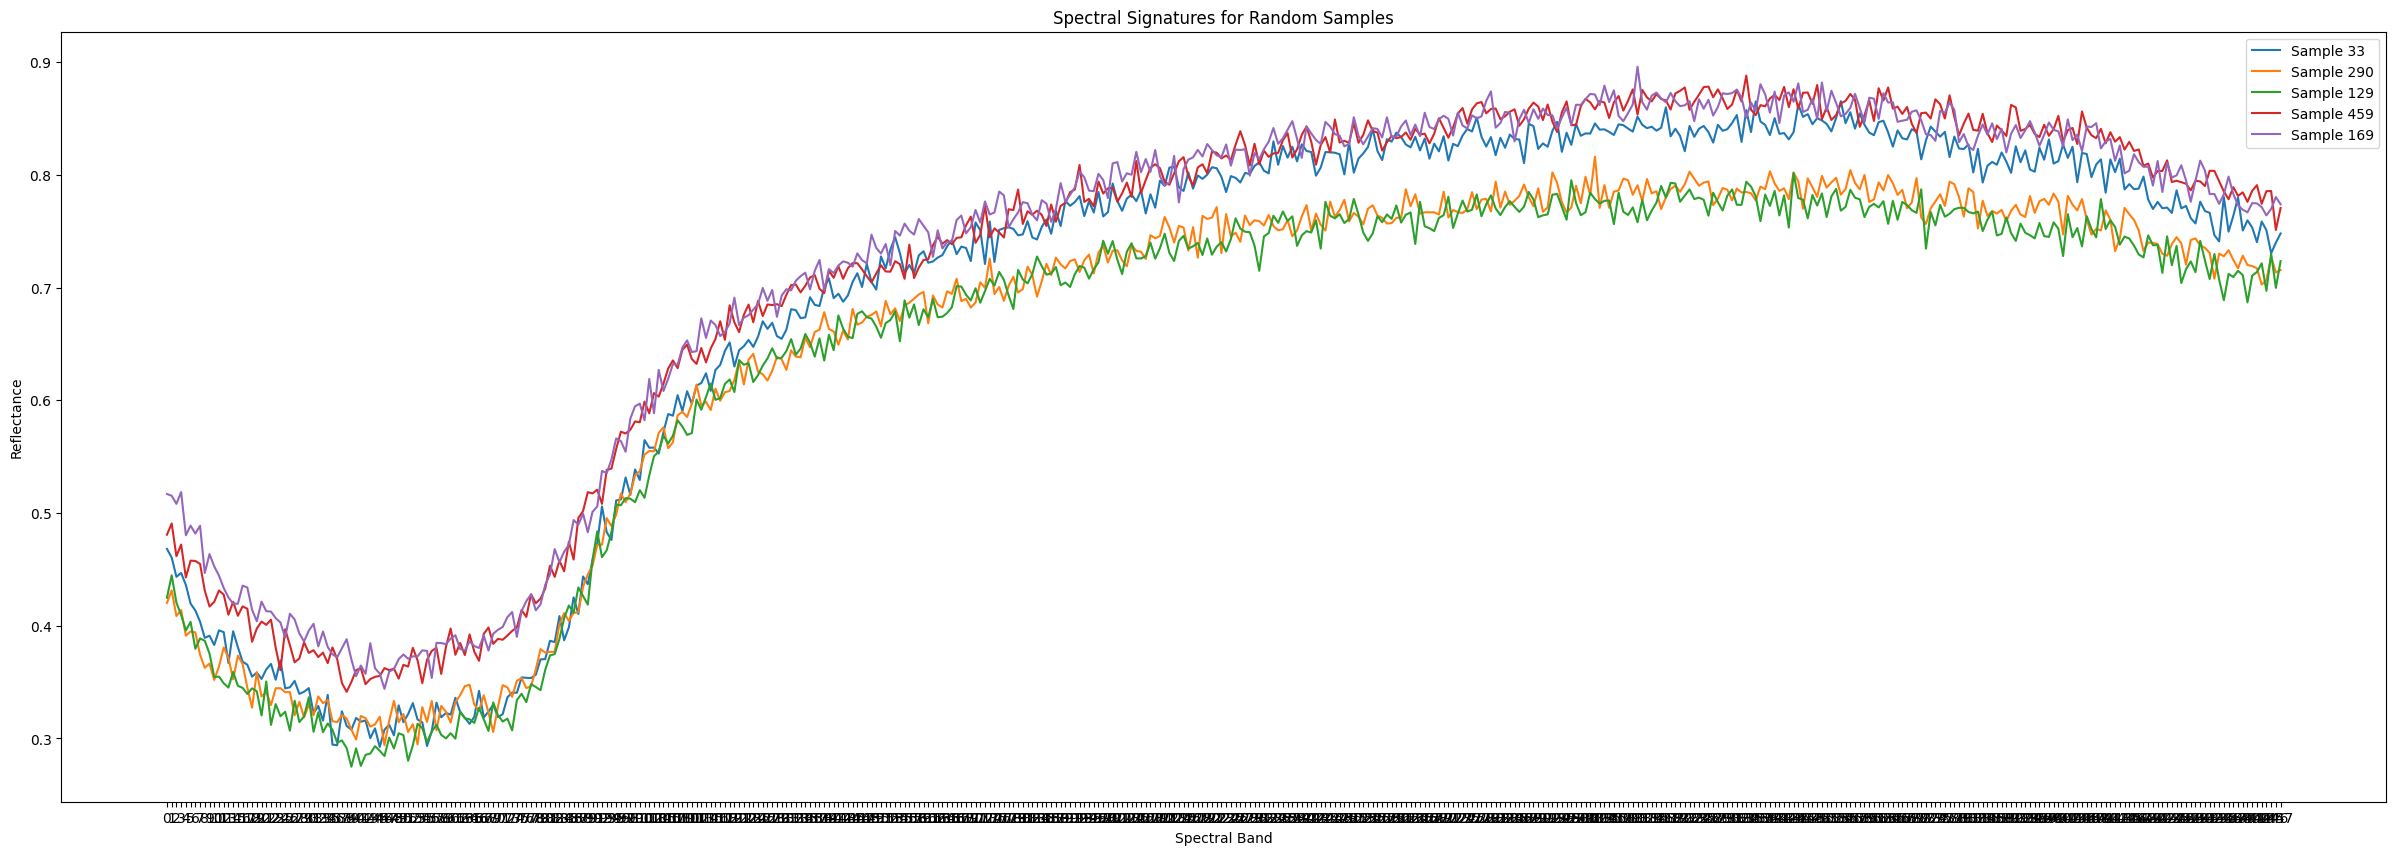

In [16]:
plt.figure(figsize=(30, 10))
for idx in df.sample(5).index:
    print(f"Sample idx {idx} , vomitoxin_ppb : {df.loc[idx, 'vomitoxin_ppb']}")
    spectral_bands = list(spectral_bands)
    plt.plot(spectral_bands, df.loc[idx, spectral_bands], label=f'Sample {idx}')

plt.title('Spectral Signatures for Random Samples')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

In [17]:
zero_ppb = df[df['vomitoxin_ppb'] == 0].index

Sample idx 10 , vomitoxin_ppb : 0.0
Sample idx 19 , vomitoxin_ppb : 0.0
Sample idx 32 , vomitoxin_ppb : 0.0
Sample idx 33 , vomitoxin_ppb : 0.0
Sample idx 35 , vomitoxin_ppb : 0.0


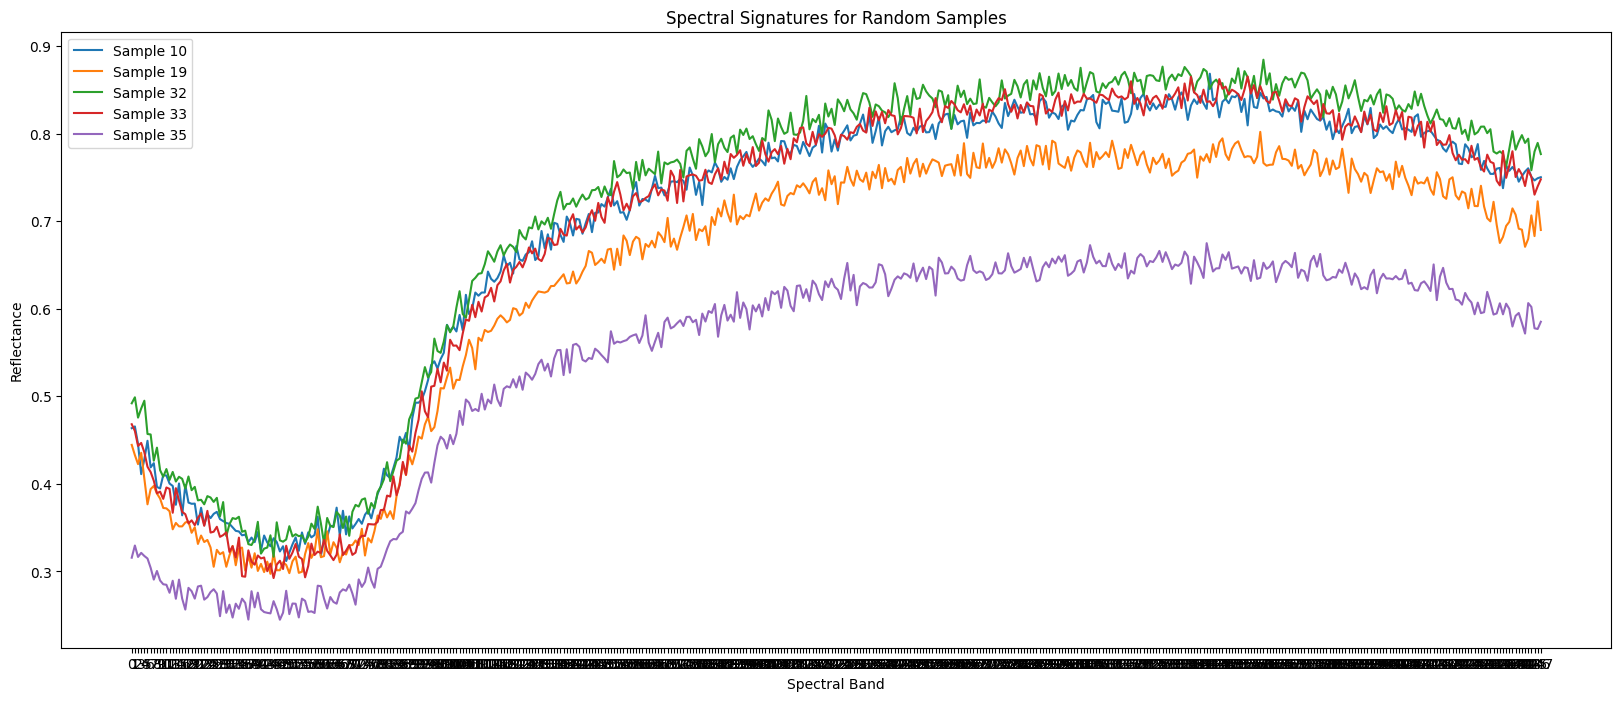

In [18]:
plt.figure(figsize=(20,8))
for idx in zero_ppb[:5]:
    print(f"Sample idx {idx} , vomitoxin_ppb : {df.loc[idx, 'vomitoxin_ppb']}")
    spectral_bands = list(spectral_bands)
    plt.plot(spectral_bands, df.loc[idx, spectral_bands], label=f'Sample {idx}')

plt.title('Spectral Signatures for Random Samples')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

from the above plot there is no relation of sample of corn with vomitoxin_ppb = 0

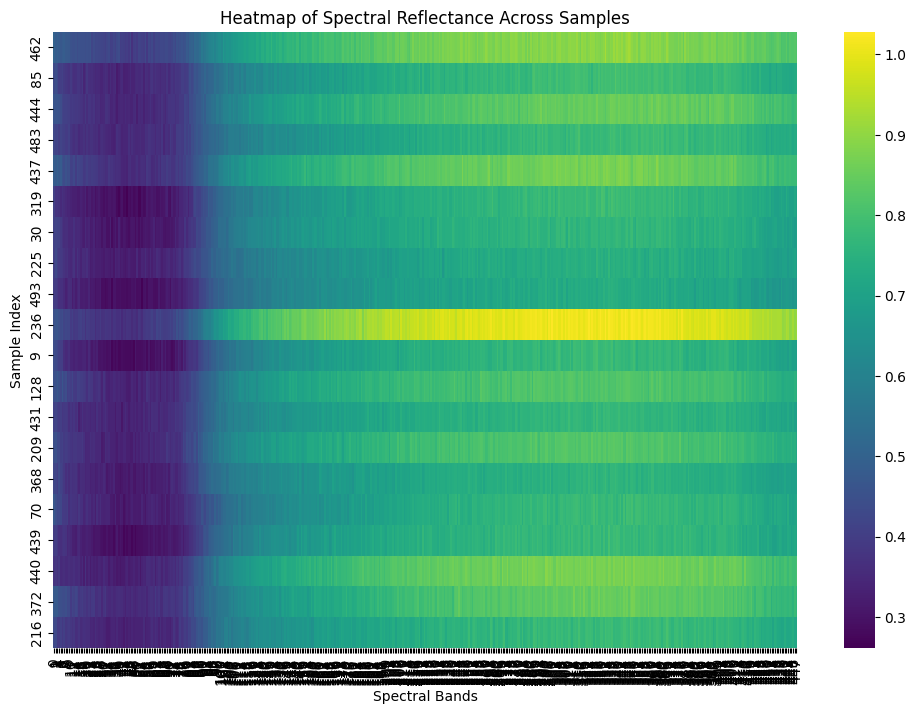

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select a random subset of samples (adjust sample size as needed)
num_samples = 20  # Change based on dataset size
df_subset = df.sample(num_samples, random_state=42)  


plt.figure(figsize=(12, 8))  

# Create a heatmap for reflectance values
sns.heatmap(df_subset[spectral_bands], cmap="viridis", xticklabels=spectral_bands, yticklabels=df_subset.index)

plt.xlabel("Spectral Bands")
plt.ylabel("Sample Index")
plt.title("Heatmap of Spectral Reflectance Across Samples")
plt.show()

* Moving from left to right, you can observe how reflectance generally increases or changes across different wavelengths. Samples that appear consistently lighter or darker overall indicate systematically higher or lower reflectance.
* Any noticeably brighter or darker “stripe” in a row suggests a particular band where that sample’s reflectance stands out, potentially revealing unique spectral features.

Sample idx 236 , vomitoxin_ppb : 800.0
Sample idx 493 , vomitoxin_ppb : 1900.0


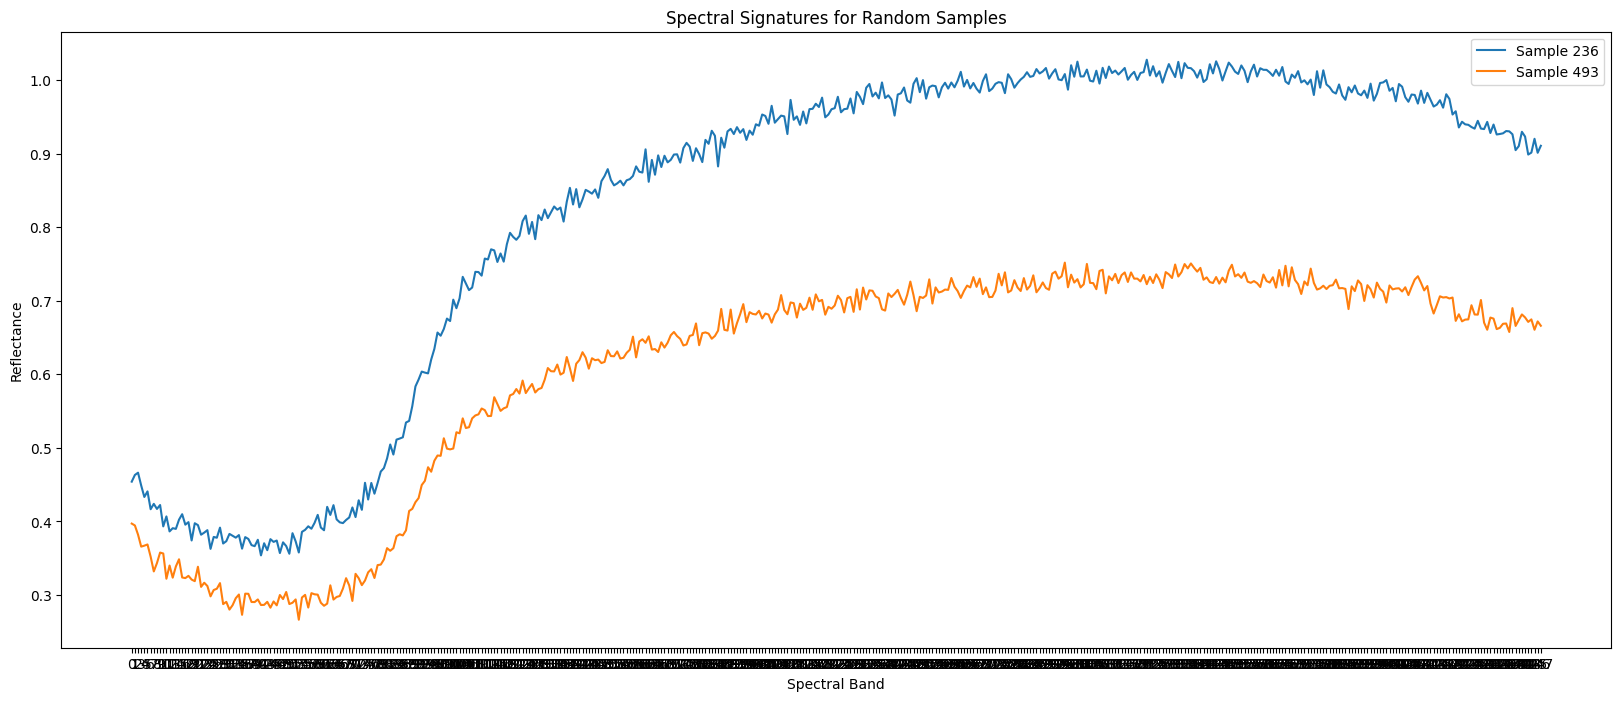

In [20]:
plt.figure(figsize=(20,8))
for idx in [236,493]:
    print(f"Sample idx {idx} , vomitoxin_ppb : {df.loc[idx, 'vomitoxin_ppb']}")
    spectral_bands = list(spectral_bands)
    plt.plot(spectral_bands, df.loc[idx, spectral_bands], label=f'Sample {idx}')

plt.title('Spectral Signatures for Random Samples')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

# Standardization and PCA(Principle Component Analysis)

The histograms reveal that each spectral band has its own range and mean, indicating different scales. Because PCA is sensitive to scale, I standardize the data (subtract the mean and divide by the standard deviation for each band) so that each feature has mean 0 and standard deviation 1. This ensures that no single band dominates the principal components due to its larger or smaller variance.

In [21]:
X = df.drop(columns = ['hsi_id' , 'vomitoxin_ppb'])
y = df['vomitoxin_ppb']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test  : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test  : {y_test.shape}")

Shape of X_train : (392, 448)
Shape of X_test  : (98, 448)
Shape of y_train : (392,)
Shape of y_test  : (98,)


In [24]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [25]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_

In [26]:
print(cumulative_variance)

[0.8805856  0.93413873 0.95050886 0.96206146 0.96435299 0.96512854
 0.96565922 0.9660699  0.96646671 0.9668614  0.96725075 0.9676235
 0.967991   0.96834393 0.9686883  0.96902946 0.96936416 0.96969736
 0.97002445 0.97034862 0.97066972 0.97098706 0.97129913 0.97160797
 0.97191308 0.97221703 0.9725141  0.97280911 0.97309841 0.973385
 0.97366509 0.97394213 0.97421677 0.97448932 0.97475985 0.97502644
 0.97528758 0.9755445  0.97579923 0.97605027 0.97629763 0.97654302
 0.97678716 0.97702709 0.97726384 0.97749782 0.97772772 0.97795468
 0.97817921 0.97839989 0.97861787 0.97883538 0.97905118 0.97926653
 0.97948064 0.97969249 0.97990014 0.98010493 0.98030909 0.98051008
 0.98071004 0.98090774 0.98110469 0.98129791 0.98148955 0.98167897
 0.98186788 0.98205296 0.98223594 0.98241687 0.98259523 0.9827727
 0.98294968 0.98312388 0.98329667 0.98346908 0.98363829 0.98380618
 0.98397233 0.98413751 0.9843003  0.9844625  0.98462377 0.98478354
 0.98494067 0.98509702 0.98525145 0.985404   0.98555593 0.98570586

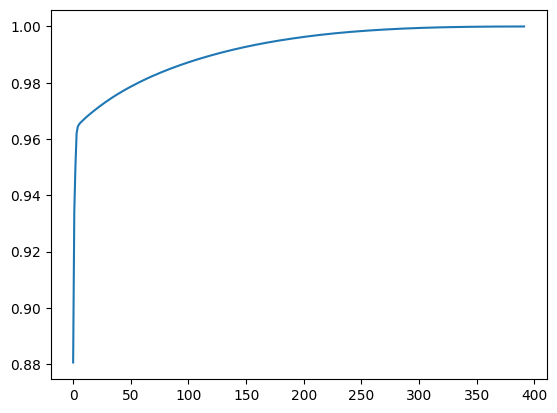

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
# we will set n_components = 0.95 
pca = PCA(n_components = 0.95)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
print(f"Shape of X_train_trf : {X_train_trf.shape}")
print(f"Shape of X_test_trf : {X_test_trf.shape}")

Shape of X_train_trf : (392, 3)
Shape of X_test_trf : (98, 3)


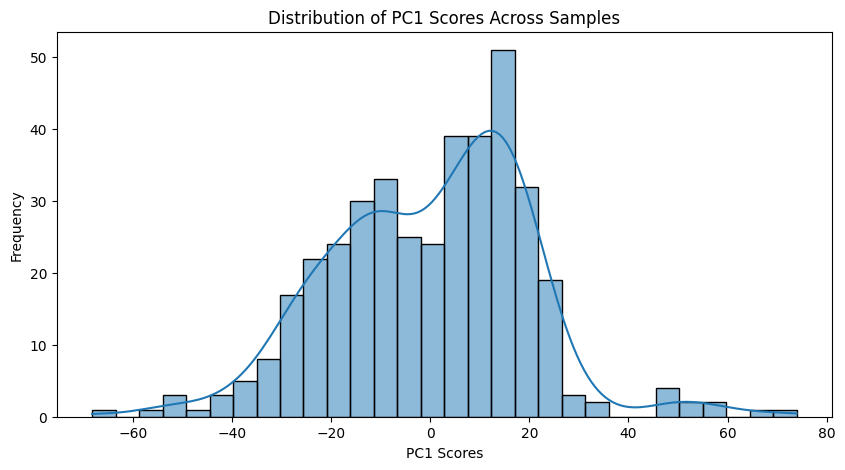

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train_trf[:, 0], bins=30, kde=True)  # PC1 values for all samples
plt.xlabel("PC1 Scores")
plt.ylabel("Frequency")
plt.title("Distribution of PC1 Scores Across Samples")
plt.show()

the graph has two peak mean two different samples

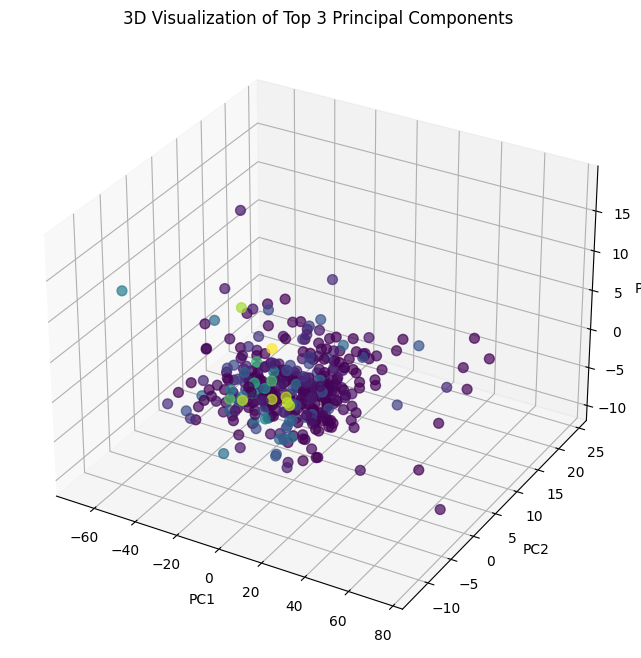

In [31]:
pc1 = X_train_trf[:, 0]
pc2 = X_train_trf[:, 1]
pc3 = X_train_trf[:, 2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

labels = y_train

scatter = ax.scatter(pc1, pc2, pc3, c=y_train, cmap='viridis',s=50, alpha=0.7) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of Top 3 Principal Components')

plt.show()

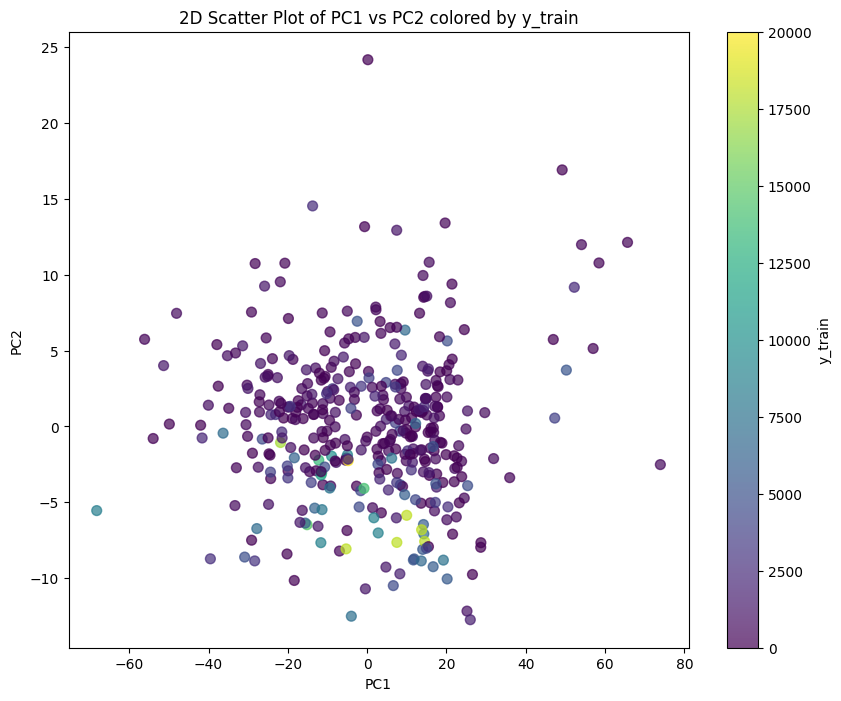

In [32]:
plt.figure(figsize=(10, 8))
# Scatter plot: points colored by y_train; adjust 'cmap' if needed
scatter = plt.scatter(pc1, pc2, c=y_train, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Scatter Plot of PC1 vs PC2 colored by y_train')
# Add a colorbar to show the mapping of colors to target values
plt.colorbar(scatter, label='y_train')

plt.show()

# Model Training

* Support Vector Regression (SVR):
SVR can capture complex, non-linear relationships between high-dimensional hyperspectral reflectance data and the target variable by leveraging various kernels (e.g., RBF, polynomial). It often performs well on datasets where the relationship between features and output is not strictly linear.

* Random Forest:
Random Forests handle high-dimensional data effectively and are less prone to overfitting than single decision trees. They combine multiple decision trees (bagging) to reduce variance, making them robust to noise and outliers in hyperspectral data.

* Gradient Boosting:
Gradient Boosting sequentially improves weaker models (decision trees) by focusing on the residual errors of previous iterations. This iterative refinement can capture subtle patterns in hyperspectral reflectance, especially when dealing with complex interactions among spectral bands.

By tuning hyperparameters of these three algorithms using Optuna, we can systematically identify the best model configuration for predicting the target variable (e.g., toxin levels) from hyperspectral reflectance data.

In [36]:
def objective(trial):
    # Choose the regressor to tune
    regressor_name = trial.suggest_categorical('regressor', ['SVR', 'RandomForest', 'GradientBoosting'])

    if regressor_name == 'SVR':
        # SVR hyperparameters
        c = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
        
        model = SVR(C=c, kernel=kernel, gamma=gamma)
    
    elif regressor_name == 'RandomForest':
        # Random Forest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )
    
    elif regressor_name == 'GradientBoosting':
        # Gradient Boosting hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        
        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='r2').mean()
    return score


In [38]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2025-03-14 16:55:29,715] A new study created in memory with name: no-name-5c1b5cec-4211-44d6-8459-76555bbff630
[I 2025-03-14 16:55:55,488] Trial 0 finished with value: 0.21643142866712695 and parameters: {'regressor': 'RandomForest', 'n_estimators': 298, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 8, 'bootstrap': True}. Best is trial 0 with value: 0.21643142866712695.
[I 2025-03-14 16:56:02,322] Trial 1 finished with value: 0.1173740907847141 and parameters: {'regressor': 'GradientBoosting', 'n_estimators': 73, 'learning_rate': 0.17304798741030308, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.21643142866712695.
[I 2025-03-14 16:56:38,225] Trial 2 finished with value: 0.18083964040619394 and parameters: {'regressor': 'RandomForest', 'n_estimators': 276, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.21643142866712695.
[I 2025-03-14 16:57:05,534] Trial 3

In [39]:
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)

Best trial parameters: {'regressor': 'RandomForest', 'n_estimators': 298, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 8, 'bootstrap': True}
Best trial accuracy: 0.21643142866712695


In [47]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    neg_rmse = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()
    rmse = -neg_rmse
    return rmse

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)

print("Best trial parameters:", study.best_trial.params)
print("Best trial RMSE:", study.best_trial.value)

[I 2025-03-14 17:09:32,833] A new study created in memory with name: no-name-eece0042-469a-4596-8169-2dcc3bf203d8
[I 2025-03-14 17:09:56,628] Trial 0 finished with value: 2977.051449616692 and parameters: {'n_estimators': 184, 'max_depth': 8}. Best is trial 0 with value: 2977.051449616692.
[I 2025-03-14 17:10:15,603] Trial 1 finished with value: 2950.284635418495 and parameters: {'n_estimators': 116, 'max_depth': 14}. Best is trial 1 with value: 2950.284635418495.
[I 2025-03-14 17:10:29,108] Trial 2 finished with value: 2993.0290642916384 and parameters: {'n_estimators': 147, 'max_depth': 5}. Best is trial 1 with value: 2950.284635418495.
[I 2025-03-14 17:10:42,570] Trial 3 finished with value: 2962.973885538738 and parameters: {'n_estimators': 82, 'max_depth': 16}. Best is trial 1 with value: 2950.284635418495.
[I 2025-03-14 17:10:56,827] Trial 4 finished with value: 2995.5651885243788 and parameters: {'n_estimators': 93, 'max_depth': 11}. Best is trial 1 with value: 2950.284635418495

Best trial parameters: {'n_estimators': 94, 'max_depth': 15}
Best trial RMSE: 2949.824736228826


In [49]:
best_params = study.best_trial.params

model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)

model.fit(X_train_trf, y_train)

y_pred = model.predict(X_test_trf)


In [59]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 4036476.5317
Root Mean Squared Error (RMSE): 2009.0984
R² Score: 0.4273


* Possible Reasons for High Error:
    * Model Complexity:
        The selected models (SVR, Random Forest, Gradient Boosting) might not fully capture the complex relationships inherent in hyperspectral data.
    * Feature Correlation and Dimensionality:
    Despite PCA reducing dimensionality, the highly correlated nature of the spectral bands may still leave redundant or less informative features affecting prediction accuracy.
    * Outlier Impact:
    Even after removing extreme outliers in the target variable, remaining extreme values or undetected anomalies could bias the model.




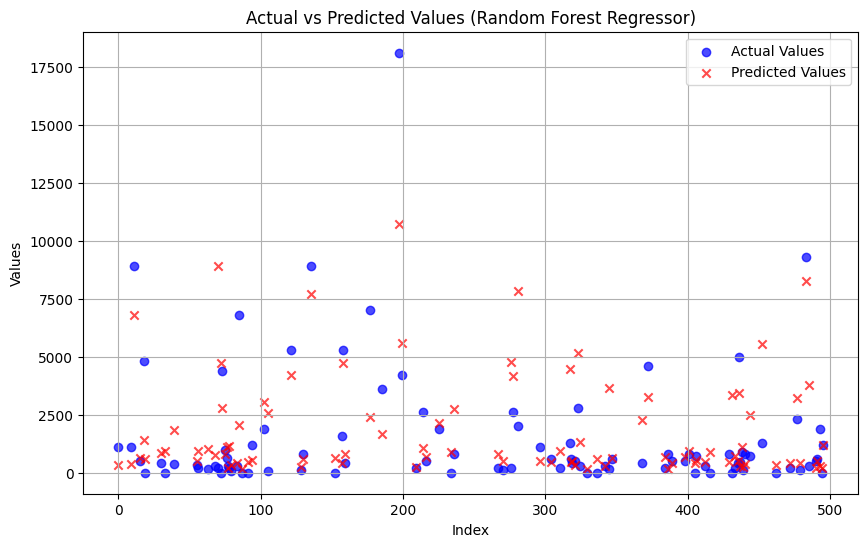

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual Values', color='blue', marker='o', alpha=0.7)
plt.scatter(y_test.index, y_pred, label='Predicted Values', color='red', marker='x', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()